In [3]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
#######
import scipy as sp
from bisect import bisect  # to compute time index
import pygsp
from pygsp import graphs
from pygsp import filters
#######
from matrixprofile.matrixProfile import stomp
from matrixprofile.motifs import motifs
from matrixprofile.discords import discords

In [5]:
signal = pd.read_csv('traffic_sum_node.csv', index_col=0) # read matrix of signals
G1 = nx.read_gml('/home/manuelherrera/Data/BT_data/graph_anonymous.gml')

G2 = G1.to_undirected()
#for c in nx.connected_components(G2):
#    G2.subgraph(c)
    
largest_cc = max(nx.connected_components(G2), key=len)

Gc = G2.subgraph(largest_cc) 
pos = nx.spring_layout(Gc) # layout by default that it is saved for future use

nnodes = len(Gc) # 222 nodes - 206 now
nedges = Gc.number_of_edges() # 730 edges - 722 now

node_names = list(Gc.nodes); link_names = list(Gc.edges)

# initializing substring 
subs = 'core-aln1'
node_names1 = [i for i in node_names if subs in i]

G = Gc.subgraph(node_names1)

pos = nx.spring_layout(G) # layout by default that it is saved for future use

# Fixing node classifications
G.nodes['core-aln1.tan-chachalaca']['nodeType'] = 'regional'
G.nodes['core-aln1.whimsical-angelfish']['nodeType'] = 'metro'

nodes_super = [x for x,y in G.nodes(data=True) if y['nodeType']=='super']
nodes_regional = [x for x,y in G.nodes(data=True) if y['nodeType']=='regional']
nodes_metro = [x for x,y in G.nodes(data=True) if y['nodeType']=='metro']
nodes_inner = [x for x,y in G.nodes(data=True) if y['nodeType']=='super' or y['nodeType']=='regional']
nodes_outer = [x for x,y in G.nodes(data=True) if y['nodeType']=='regional' or y['nodeType']=='metro']
df_inner = signal[nodes_inner]
df_outer = signal[nodes_outer]

In [6]:
def color_map(Graph):
    color_map_n = []
    for i in Graph.nodes():
        if Graph.nodes[i]['nodeType'] == 'super':
            color_map_n.append('red')
        elif Graph.nodes[i]['nodeType'] == 'regional':
            color_map_n.append('orange')
        elif Graph.nodes[i]['nodeType'] == 'metro':
            color_map_n.append('green')
        else: color_map_n.append('blue')
    return color_map_n

In [7]:
signal = pd.read_csv('traffic_sum_node.csv', index_col=0) # read matrix of signals

In [8]:
df_outer

,core-aln1.athletic-galago,core-aln1.pistachio-partridge,core-aln1.married-bobcat,core-aln1.versed-bug,core-aln1.opal-jellyfish,core-aln1.jovial-quetzal,core-aln1.polar-gharial,core-aln1.aspiring-poodle,core-aln1.magic-ferret,core-aln1.sophisticated-barracuda,...,core-aln1.maize-parrot,core-aln1.ethereal-ibex,core-aln1.curvy-gopher,core-aln1.busy-marten,core-aln1.cerise-prawn,core-aln1.outrageous-mosquito,core-aln1.magnificent-petrel,core-aln1.nifty-puma,core-aln1.tall-frog,core-aln1.teal-nuthatch
0,3.053625e+10,2.491295e+10,4.436340e+10,2.385340e+10,1.659143e+10,1.907147e+10,1.900910e+10,5.633149e+10,2.224058e+10,3.479755e+10,...,3.374719e+10,1.740911e+10,1.798160e+11,5.900034e+10,2.468580e+10,2.377381e+10,2.509720e+10,1.778971e+10,1.484146e+10,2.115973e+10
1,3.064604e+10,2.460847e+10,4.483590e+10,2.429165e+10,1.643260e+10,1.925892e+10,1.930549e+10,5.636721e+10,2.194725e+10,3.415146e+10,...,3.327360e+10,1.734035e+10,1.791991e+11,5.901066e+10,2.449072e+10,2.385170e+10,2.480152e+10,1.771730e+10,1.447032e+10,2.152419e+10
2,3.094182e+10,2.445915e+10,4.491462e+10,2.453996e+10,1.680511e+10,1.945406e+10,1.923429e+10,5.689477e+10,2.261750e+10,3.538257e+10,...,3.349792e+10,1.745683e+10,1.788993e+11,5.915205e+10,2.474327e+10,2.365845e+10,2.503838e+10,1.776950e+10,1.477591e+10,2.131840e+10
3,3.139997e+10,2.427458e+10,4.487265e+10,2.450029e+10,1.660366e+10,1.932503e+10,1.923567e+10,5.700956e+10,2.239531e+10,3.535561e+10,...,3.317885e+10,1.739776e+10,1.799343e+11,6.093849e+10,2.487443e+10,2.385940e+10,2.501281e+10,1.778306e+10,1.436539e+10,2.135061e+10
4,3.195247e+10,2.415466e+10,4.544950e+10,2.502835e+10,1.691326e+10,1.922085e+10,1.932475e+10,5.788210e+10,2.201933e+10,3.542853e+10,...,3.389070e+10,1.749598e+10,1.800393e+11,6.046987e+10,2.512111e+10,2.401582e+10,2.572602e+10,1.829264e+10,1.453178e+10,2.178662e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3.428769e+10,2.556101e+10,4.714304e+10,2.303895e+10,1.627123e+10,1.670107e+10,1.880645e+10,5.301538e+10,2.303630e+10,3.530339e+10,...,3.527487e+10,1.789443e+10,1.900088e+11,6.251287e+10,2.573963e+10,2.194904e+10,2.491132e+10,1.772259e+10,1.377056e+10,2.136186e+10
716,3.413434e+10,2.539874e+10,4.687020e+10,2.272651e+10,1.659757e+10,1.656198e+10,1.909193e+10,5.332676e+10,2.275366e+10,3.632354e+10,...,3.525190e+10,1.798470e+10,1.914590e+11,6.280380e+10,2.551627e+10,2.214843e+10,2.463324e+10,1.774821e+10,1.427885e+10,2.163495e+10
717,3.355399e+10,2.512137e+10,4.697988e+10,2.313434e+10,1.668129e+10,1.632828e+10,1.912877e+10,5.345947e+10,2.302018e+10,3.568892e+10,...,3.566586e+10,1.805171e+10,1.916873e+11,6.351821e+10,2.553038e+10,2.241286e+10,2.474927e+10,1.844750e+10,1.440841e+10,2.159899e+10
718,3.435191e+10,2.507529e+10,4.669933e+10,2.325362e+10,1.647216e+10,1.690663e+10,1.932275e+10,5.336941e+10,2.290751e+10,3.592899e+10,...,3.587014e+10,1.799096e+10,1.910859e+11,6.324287e+10,2.549332e+10,2.263613e+10,2.504651e+10,1.790499e+10,1.438620e+10,2.166509e+10


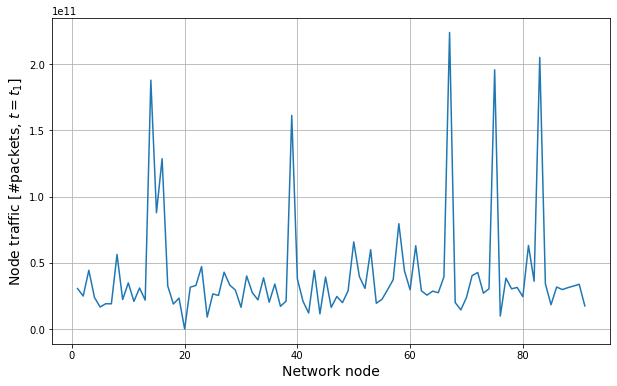

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Network node',  fontsize=14)
plt.ylabel('Node traffic [#packets, $t = t_1$]',  fontsize=14)
aux = [i for i in range(1, 92)]
ax.plot(aux, list(df_outer.loc[0][0:91])) #, color = 'grey', markersize=10)
#fig.savefig("Traffic_outer_t1.pdf", bbox_inches='tight')

In [10]:
Network2 = G.subgraph(nodes_outer)
remove = [node for node,degree in dict(Network2.degree()).items() if degree == 0]
Network = Network2.copy()
Network.remove_nodes_from(remove)
#df_outer

In [11]:
remove

['core-aln1.versed-bug',
 'core-aln1.demonic-donkey',
 'core-aln1.misty-hog',
 'core-aln1.brass-nuthatch',
 'core-aln1.smooth-raven',
 'core-aln1.pistachio-harrier',
 'core-aln1.brilliant-badger']

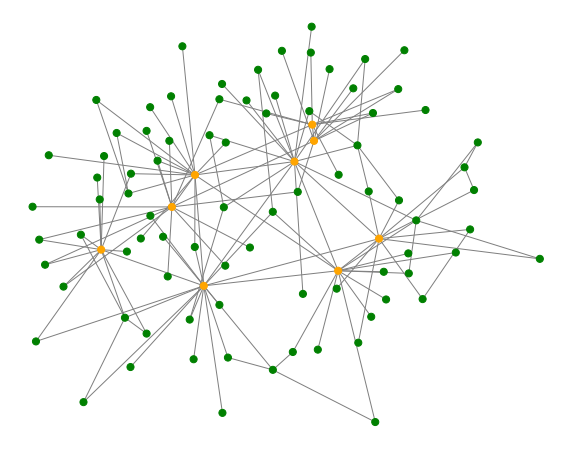

In [12]:
color_map_n = color_map(Network)
f_outer = plt.figure(figsize=(10, 8))
plt.axis('off')
nx.draw_networkx(Network, pos, node_size=50, node_color = color_map_n, edge_color = "gray", with_labels=False)
plt.show()
#f_outer.savefig("BT_outer.pdf", bbox_inches='tight')

In [13]:
# Also remove those nodes from the BT_outer dataframe !! IMPORTANT
remove_list = []
for node in remove:
    if node in df_outer.columns:
        df_outer.drop(node, axis=1, inplace=True)
        
print("Number of columns:"); print(len(df_outer.columns))
print("Number of network nodes:"); print(len(Network))

Number of columns:
92
Number of network nodes:
92


In [14]:
cuenta = 0
for i in Network.nodes():
    print(cuenta, i, Network.nodes[i]['nodeType'])
    cuenta = cuenta + 1

0 core-aln1.athletic-galago metro
1 core-aln1.pistachio-partridge metro
2 core-aln1.married-bobcat metro
3 core-aln1.opal-jellyfish metro
4 core-aln1.jovial-quetzal metro
5 core-aln1.polar-gharial metro
6 core-aln1.aspiring-poodle metro
7 core-aln1.magic-ferret metro
8 core-aln1.sophisticated-barracuda metro
9 core-aln1.heavy-condor metro
10 core-aln1.knowing-slug metro
11 core-aln1.little-raven metro
12 core-aln1.swinging-alpaca regional
13 core-aln1.congenial-python regional
14 core-aln1.pistachio-cheetah regional
15 core-aln1.apricot-llama metro
16 core-aln1.infrared-zebu metro
17 core-aln1.cooperative-ibex metro
18 core-aln1.rugged-kangaroo metro
19 core-aln1.ivory-dragon metro
20 core-aln1.placid-elk metro
21 core-aln1.glittering-peccary metro
22 core-aln1.portable-beagle metro
23 core-aln1.weightless-silkworm metro
24 core-aln1.magic-mongrel metro
25 core-aln1.resourceful-pillbug metro
26 core-aln1.electric-mosquito metro
27 core-aln1.aloof-capuchin metro
28 core-aln1.hissing-rap

In [210]:
# Network weights to represent signal at t0
peso = df_outer.loc[0] # t0 for testing purposes... This should vary from 0 up to T = 719 in this specific case
for i in Network.nodes():
    Network.nodes[i]['weight'] = peso[i]

A = nx.adjacency_matrix(Network, weight='weight')

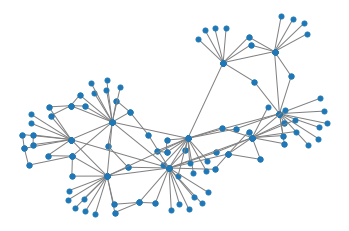

In [211]:
Network1 = graphs.Graph(W = A, gtype = 'Outer core')
Network1.set_coordinates('spring')
Network1.plot(vertex_size=50)
plt.axis('off'); plt.title('')
eig_val, U = sp.linalg.eigh(Network1.L.toarray()) 

In [212]:
# Plots plt.plot(eig_val[0:13], '+-') ; plt.imshow(G_outer1.W.toarray()) ; plt.spy(G_outer1.W, markersize=2.5)
eig_val, U = sp.sparse.linalg.eigsh(Network1.L, k=10, which='SM')
signal = np.array(peso)

<Figure size 720x720 with 0 Axes>

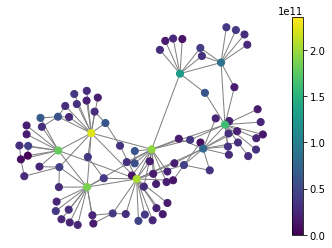

In [213]:
plt.figure(figsize=(10, 10))
Network1.plot_signal(signal, vertex_size=50)
plt.axis('off'); plt.title(''); # plt.savefig('Signal_t1.pdf')

<Figure size 720x720 with 0 Axes>

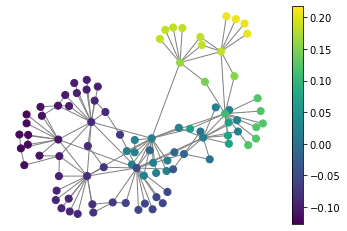

In [214]:
plt.figure(figsize=(10, 10))
Network1.plot_signal(U[:,1], vertex_size=50) # #G_outer1.plot_signal(U[:,0]);
plt.axis('off'); plt.title(''); # plt.savefig('U2_t1.pdf')

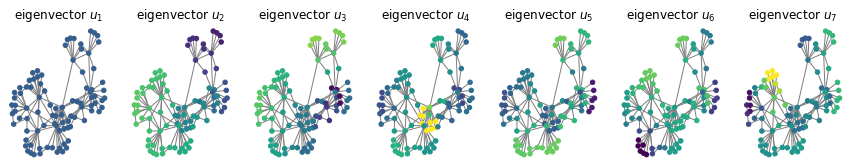

In [215]:
fig, axes = plt.subplots(1, 7, figsize=(15, 2.5))

Network1.compute_fourier_basis()

limits = [f(Network1.U[:, :len(axes)]) for f in (np.min, np.max)]

for i, ax in enumerate(axes):
    Network1.plot_signal(Network1.eigenv_col, limits=limits, colorbar=False, vertex_size=20, ax=ax)
    ax.set_title(f'eigenvector $u_{i+1}$')
    ax.set_axis_off()

The largest entry in the Fourier basis is 0.9311936877208187


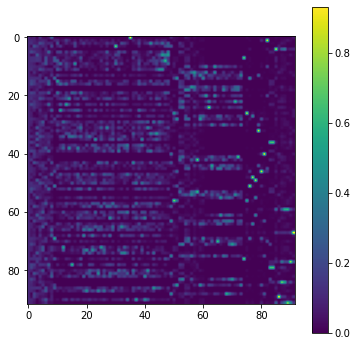

In [216]:
fig = plt.figure(figsize=(6, 6))
plt.imshow(np.abs(Network1.U))
plt.colorbar()
# fig.savefig("U_t1.pdf", bbox_inches='tight')
print('The largest entry in the Fourier basis is ' + str(np.max(np.abs(Network1.U))))

Text(0.5, 0, "laplacian's eigenvalues / graph frequencies")

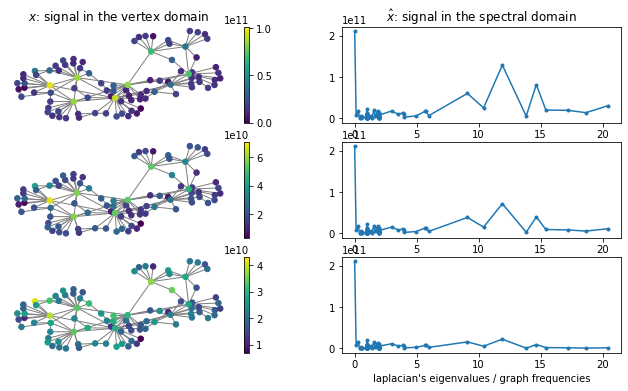

In [221]:
Network1.compute_fourier_basis()

taus = [0, 1, 3]
fig, axes = plt.subplots(len(taus), 2, figsize = (11, 6))

x0 = df_outer.loc[316] # np.random.RandomState(1).normal(size = Network1.N)
for i, tau in enumerate(taus):
    g = filters.Heat(Network1, tau)
    x = g.filter(x0).squeeze()
    x_hat = Network1.gft(x).squeeze()
    
    Network1.plot_signal(x, vertex_size=30, ax=axes[i, 0])
    axes[i, 0].set_axis_off()
    axes[i, 0].set_title('')
   # axes[i, 0].text(-0.7, -1.2, '$x^T L x = {:.2f}$'.format(x.T @ Network1.L @ x))
    
    axes[i, 1].plot(Network1.e, np.abs(x_hat), '.-')
    
axes[0, 0].set_title(r'$x$: signal in the vertex domain')
axes[0, 1].set_title(r'$\hat{x}$: signal in the spectral domain')
axes[-1, 1].set_xlabel("laplacian's eigenvalues / graph frequencies")

In [222]:
tau = 1
spectra = []
myInt = 10e9
for i in range(len(df_outer)):
    peso = df_outer.loc[i]
    zpeso = [x / myInt for x in peso]
    x0 = np.array(zpeso)
    g = filters.Heat(Network1, tau)
    x = g.filter(x0).squeeze()
    x_hat = Network1.gft(x).squeeze()
    spectra.extend(np.abs(x_hat).tolist())

In [223]:
#spectra = list(filter(lambda x: x < 10, spectra))

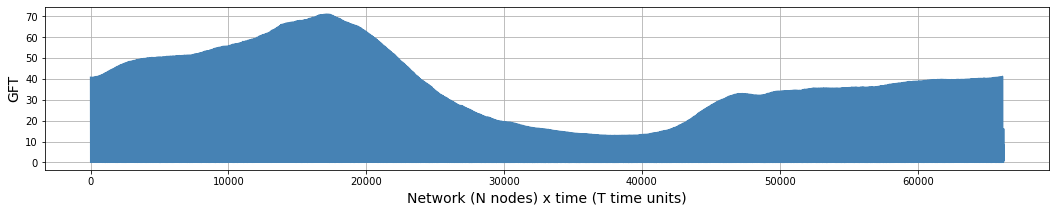

In [224]:
fig, ax = plt.subplots(figsize=(18, 3))
plt.grid(True)
plt.xlabel('Network (N nodes) x time (T time units)',  fontsize=14)
plt.ylabel('GFT', fontsize=14)
ax.plot(spectra, color = 'steelblue', markersize=10)
#fig.savefig("GSP_MP_outer1a.pdf", bbox_inches='tight')

In [184]:
window_size = 92
mp, mpi = stomp(spectra, window_size)

In [185]:
mpi

array([   92.,    93.,    94., ..., 66054., 66055., 66056.])

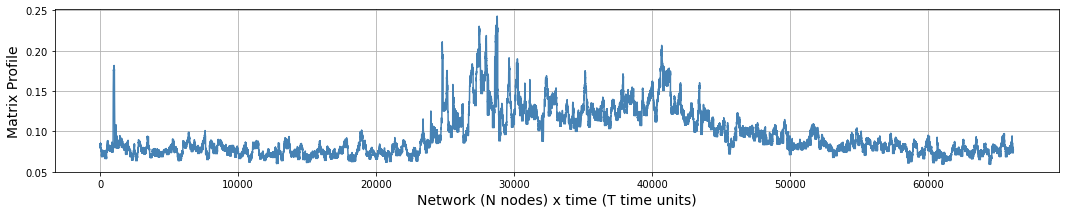

In [225]:
fig, ax = plt.subplots(figsize=(18, 3))
plt.grid(True)
plt.xlabel('Network (N nodes) x time (T time units)',  fontsize=14)
plt.ylabel('Matrix Profile',  fontsize=14)
ax.plot(mp, color = 'steelblue', markersize=4)
#fig.savefig("GSP_MP_outer1b.pdf", bbox_inches='tight')

In [ ]:
#window_size = 92
#top_discords = discords(mp, window_size, k=5)
#fg, ax = plt.subplots(figsize=(18, 3))
#plt.xlabel('Network (N nodes) x time (T time units)',  fontsize=14)
#plt.ylabel('GFT',  fontsize=14)
#ax.plot([i for i in range(2500, 5000)], spectra[2500:5000], color = 'steelblue', markersize=4)
#for start_index in top_discords:
#    aux = [i for i in range(start_index, start_index+window_size)]
#    ax.plot(aux, spectra[start_index:(start_index+window_size)], color = 'red')
#plt.show()

In [226]:
# window_size = 92
top_discords = discords(mp, window_size, k=10)
top_discords # Outer core: array([28759, 28655, 27453, 27969, 24775])

array([28759, 28655, 27453, 27969, 24775, 40676, 27357, 29621, 30218,
       26942])

In [227]:
data = np.array(spectra, dtype=np.float32)
top_motifs = motifs(data, (mp,mpi), max_motifs=5, ex_zone=window_size, n_neighbors=5)
top_motifs

([[63576, 64220, 64404, 64496, 64772],
  [60552, 60736, 61012, 61104, 61288],
  [12226, 12410, 12594, 12778, 12870],
  [58230, 58506, 58598, 58782, 59058],
  [59407, 59775, 60143, 60327, 60419]],
 [0.05900958167678993,
  0.059264075207573166,
  0.06006039050396786,
  0.0605817293607757,
  0.06102013409409562])

In [ ]:
#indices = [item[0] for item in top_motifs[0]]
#fg, ax = plt.subplots(figsize=(18, 3))
#plt.xlabel('Network (N nodes) x time (T time units)',  fontsize=14)
#plt.ylabel('GFT',  fontsize=14)
#ax.plot([i for i in range(300, 3100)], spectra[300:3100], color = 'steelblue', markersize=4)
#for start_index in indices:
#    aux = [i for i in range(start_index, start_index+window_size)]
#    ax.plot(aux, spectra[start_index:(start_index+window_size)], color = 'black')
#plt.show()

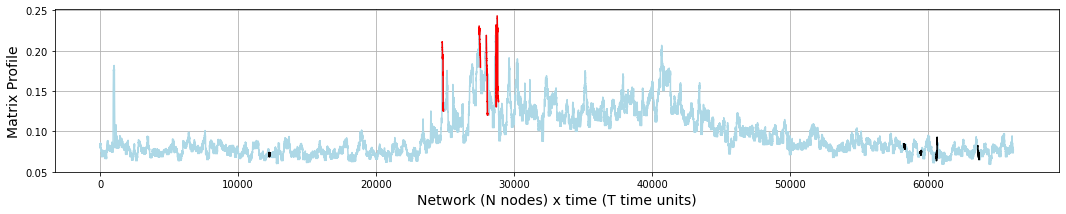

In [232]:
indices = [item[0] for item in top_motifs[0]]
top_discords = discords(mp, window_size, k=5)

fig, ax = plt.subplots(figsize=(18, 3))
plt.grid(True)
plt.xlabel('Network (N nodes) x time (T time units)',  fontsize=14)
plt.ylabel('Matrix Profile',  fontsize=14)
ax.plot(mp, color = 'lightblue', markersize=4)
for start_index in indices:
    aux = [i for i in range(start_index, start_index+window_size)]
    ax.plot(aux, mp[start_index:(start_index+window_size)], color = 'black')
for start_index in top_discords:
    aux = [i for i in range(start_index, start_index+window_size)]
    ax.plot(aux, mp[start_index:(start_index+window_size)], color = 'red')
#fig.savefig("GSP_MP_outer1br.pdf", bbox_inches='tight')

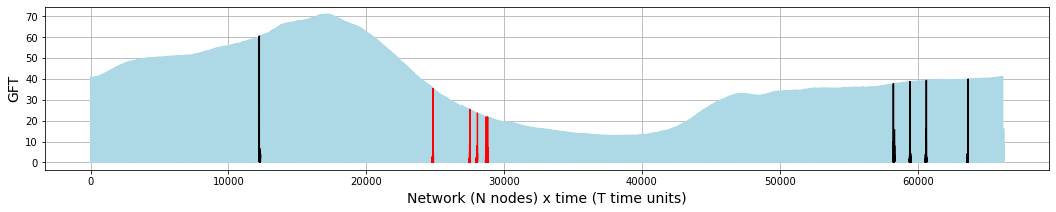

In [143]:
fig, ax = plt.subplots(figsize=(18, 3))
plt.grid(True)
plt.xlabel('Network (N nodes) x time (T time units)',  fontsize=14)
plt.ylabel('GFT',  fontsize=14)
ax.plot(spectra, color = 'lightblue', markersize=10)
for start_index in indices:
    aux = [i for i in range(start_index, start_index+window_size)]
    ax.plot(aux, spectra[start_index:(start_index+window_size)], color = 'black')
for start_index in top_discords:
    aux = [i for i in range(start_index, start_index+window_size)]
    ax.plot(aux, spectra[start_index:(start_index+window_size)], color = 'red')
#fig.savefig("GSP_MP_outer1ar.pdf", bbox_inches='tight')

In [181]:
[item[0] for item in top_motifs[0]]

[335, 678, 1615, 2525, 2995]

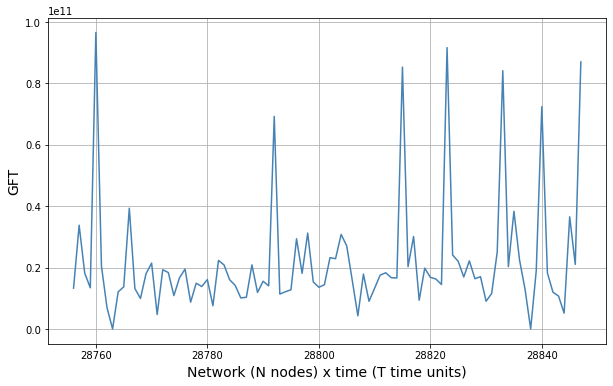

In [231]:
#indices = [item[0] for item in top_motifs[0]]
fg, ax = plt.subplots(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Network (N nodes) x time (T time units)',  fontsize=14)
plt.ylabel('GFT',  fontsize=14)
ax.plot([i for i in range(91*316, 91*(316+1) + 1)], list(df_outer.loc[316]), color = 'steelblue', markersize=4) # [i for i in range(28759, 28850)], spectra[28759:28850]

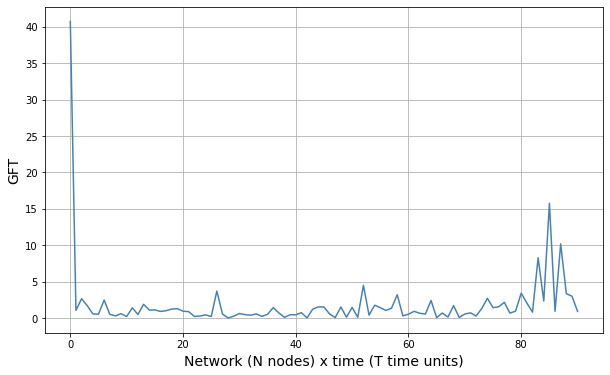

In [190]:
fg, ax = plt.subplots(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Network (N nodes) x time (T time units)',  fontsize=14)
plt.ylabel('GFT',  fontsize=14)
ax.plot([i for i in range(0, 91)], spectra[0:91], color = 'steelblue', markersize=4)

In [191]:
ind_left = [] # len(Network) = 92; time from 0 up to 719 -- or is it 1 to 720 ?
for i in range(0,720):
    if i > 0:
        ind_left.append(91*i + 1)
    else: ind_left.append(0)

ind_right = []
for i in range(1,720+1):
    ind_right.append(91*i)

In [196]:
discordx = 100 # 28759
bisect(ind_left, discordx)

2

Text(0.5, 0, "laplacian's eigenvalues / graph frequencies")

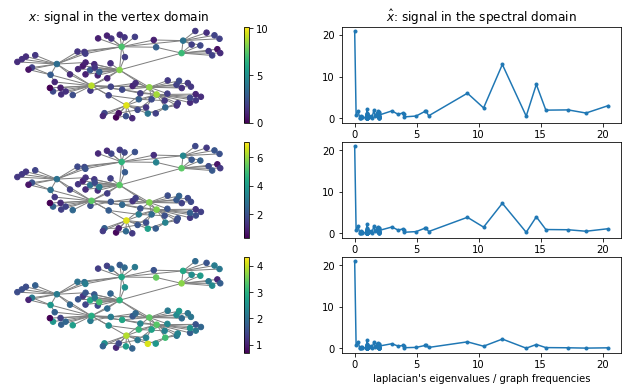

In [193]:
Network1.compute_fourier_basis()

myInt = 10e9
signal = df_outer.loc[316]
signal1 = [x / myInt for x in signal]

taus = [0, 1, 3]
fig, axes = plt.subplots(len(taus), 2, figsize = (11, 6))

x0 =  np.array(signal1)  # [x / myInt for x in signal]  # np.random.RandomState(1).normal(size = Network1.N)
for i, tau in enumerate(taus):
    g = filters.Heat(Network1, tau)
    x = g.filter(x0).squeeze()
    x_hat = Network1.gft(x).squeeze()
    
    Network1.plot_signal(x, vertex_size=30, ax=axes[i, 0])
    axes[i, 0].set_axis_off()
    axes[i, 0].set_title('')
   # axes[i, 0].text(-0.7, -1.2, '$x^T L x = {:.2f}$'.format(x.T @ Network1.L @ x))
    
    axes[i, 1].plot(Network1.e, np.abs(x_hat), '.-')
    
axes[0, 0].set_title(r'$x$: signal in the vertex domain')
axes[0, 1].set_title(r'$\hat{x}$: signal in the spectral domain')
axes[-1, 1].set_xlabel("laplacian's eigenvalues / graph frequencies")

In [254]:
x_hat

array([ 5.82778319e+01,  2.39736600e-01,  6.31620950e-01, -5.63085286e-01,
       -2.06240510e+00, -3.72888988e-02,  1.57370825e-01, -1.26338527e+00,
        5.62843634e-01, -5.29564613e-01,  5.72368422e-01,  3.86446344e-02,
       -2.91353595e-01])

Text(0.5, 1.0, '')

<Figure size 720x720 with 0 Axes>

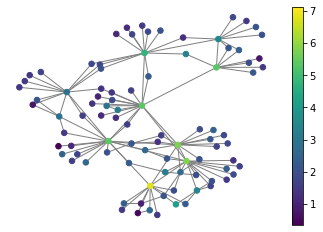

In [194]:
signal = df_outer.loc[316]
signal1 = [x / myInt for x in signal]
signal1
tau = 1
x0 =  np.array(signal1)
g = filters.Heat(Network1, tau)
x = g.filter(x0).squeeze()
x_hat = Network1.gft(x).squeeze()
plt.figure(figsize=(10, 10))
Network1.plot_signal(x, vertex_size=30)
plt.axis('off'); plt.title('')

In [242]:
# Compute the k-trimmed mean of the spectra (first step convert list to array)
aa = spectra
shape = (720, 92)
col = 92
# [aa[i:i+col] for i in range(0, len(aa), 92)]
aux_spec = np.array([aa[i:i+col] for i in range(0, len(aa), col)])
df_spec = pd.DataFrame(aux_spec)

In [243]:
df_spec

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,40.738886,1.041849,2.654386,1.698956,0.560164,0.523806,2.463155,0.508202,0.287442,0.597483,...,0.807702,8.276441,2.329584,15.749768,0.913045,10.181060,3.343312,3.001190,0.907664,2.521353
1,40.750014,1.096250,2.657971,1.713922,0.503779,0.546343,2.504154,0.520676,0.239143,0.600349,...,0.800961,8.218479,2.322667,15.745073,0.931152,10.179507,3.355781,3.068013,0.912158,2.652328
2,40.817937,1.054696,2.555764,1.723994,0.493942,0.524696,2.467986,0.560021,0.162033,0.570652,...,0.804950,8.228571,2.278885,15.721655,0.917925,10.172758,3.364903,3.026928,0.915561,2.612300
3,40.934905,1.119643,2.591713,1.687254,0.551470,0.504904,2.557135,0.583015,0.152677,0.573284,...,0.907294,8.203274,2.263919,15.771079,0.866043,10.202661,3.314615,3.053205,0.886169,2.581625
4,41.081485,1.128396,2.582589,1.777099,0.602375,0.533440,2.566575,0.513871,0.166820,0.576985,...,0.855771,8.209316,2.335614,15.787613,0.861703,10.213709,3.318822,3.069237,0.863921,2.622882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,40.771535,1.508030,3.225515,0.999509,0.910543,0.091219,1.961376,0.324357,0.533440,0.695732,...,0.803053,8.309139,2.322552,15.983517,0.847975,9.906388,3.085121,2.866118,0.726159,2.159754
716,40.886443,1.505742,3.260307,0.959064,0.877628,0.078106,1.945813,0.325359,0.607666,0.720220,...,0.811040,8.303970,2.324604,16.057231,0.820293,9.912371,3.066990,2.806539,0.750441,2.181338
717,40.959191,1.524055,3.322042,0.953782,0.870581,0.211673,2.028263,0.404267,0.554451,0.803077,...,0.831371,8.299134,2.312867,16.101333,0.854261,9.882891,3.147846,2.923183,0.798833,2.185640
718,40.982250,1.397586,3.246632,0.952508,0.862585,0.198254,2.013603,0.320116,0.610051,0.699203,...,0.829809,8.381203,2.333106,16.042668,0.854823,9.918664,3.109298,2.801113,0.756929,2.016171


In [244]:
df_gft = df_spec.copy()
for i in top_discords:
    df_gft.drop(bisect(ind_left, i) - 1, axis=0, inplace=True)

mean_gsignal = df_gft.mean(axis = 0)

In [254]:
np.array(mean_gsignal)

array([38.25656394,  1.07946243,  2.06725379,  1.09750736,  0.44465948,
        0.26620711,  1.89469653,  0.68918114,  0.40869526,  0.36477793,
        0.11355526,  1.4275711 ,  0.77945309,  2.11644047,  0.74376582,
        1.06168655,  1.10042105,  0.81534064,  1.07147992,  1.50371081,
        0.86166915,  0.61081561,  0.12108936,  0.16258195,  0.20603218,
        0.21209875,  3.93333606,  0.57523121,  0.21327721,  0.49152085,
        0.64668349,  0.71451921,  0.35311002,  0.78498631,  0.35605308,
        0.35660111,  1.386206  ,  0.41024966,  0.24267037,  0.49636619,
        0.2721513 ,  0.67458552,  0.36761141,  1.20422776,  1.93111402,
        1.49106799,  0.62013144,  0.08396405,  1.48861828,  0.19065137,
        1.06186482,  0.12061887,  3.7808072 ,  0.30903627,  1.37779163,
        1.29258267,  1.04916458,  1.07342171,  2.81723211,  0.34781238,
        1.23161385,  0.63241343,  0.70286773,  0.29378683,  2.50623659,
        0.22086254,  0.75058496,  0.37981996,  1.82572926,  0.13

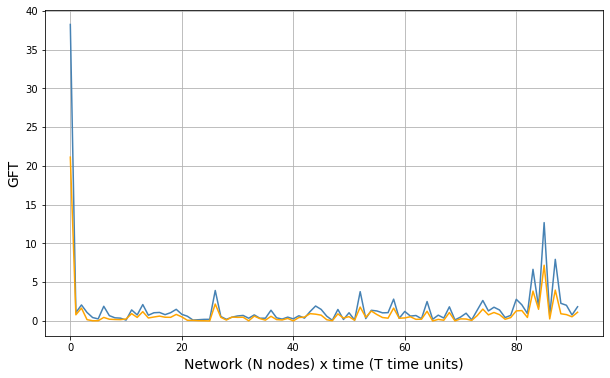

In [248]:
fg, ax = plt.subplots(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Network (N nodes) x time (T time units)',  fontsize=14)
plt.ylabel('GFT',  fontsize=14)
ax.plot(mean_gsignal, color = 'steelblue', markersize=4)
ax.plot(df_spec.loc[316], color = 'orange', markersize=4)

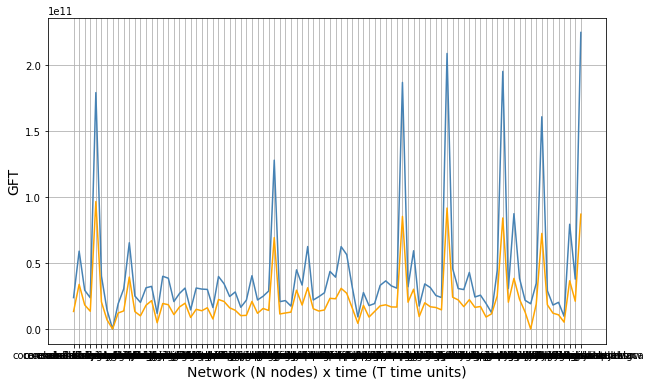

In [259]:
fg, ax = plt.subplots(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Network (N nodes) x time (T time units)',  fontsize=14)
plt.ylabel('GFT',  fontsize=14)
ax.plot(df_outer.loc[1], color = 'steelblue', markersize=4)
ax.plot(df_outer.loc[316], color = 'orange', markersize=4)

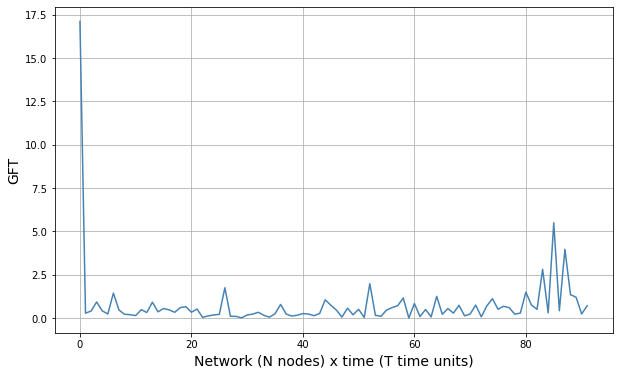

In [275]:
aux = [abs(x - y) for x,y in zip(list(mean_gsignal),list(df_spec.loc[316]))]
fg, ax = plt.subplots(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Network (N nodes) x time (T time units)',  fontsize=14)
plt.ylabel('GFT',  fontsize=14)
ax.plot(aux, color = 'steelblue', markersize=4)

In [281]:
Network.nodes()

NodeView(('core-aln1.cunning-puma', 'core-aln1.busy-marten', 'core-aln1.silent-skink', 'core-aln1.cooperative-ibex', 'core-aln1.curvy-gopher', 'core-aln1.versatile-ringtail', 'core-aln1.true-prawn', 'core-aln1.rugged-kangaroo', 'core-aln1.chocolate-capuchin', 'core-aln1.icy-earwig', 'core-aln1.fascinating-groundhog', 'core-aln1.skinny-herring', 'core-aln1.curly-wrasse', 'core-aln1.knowing-slug', 'core-aln1.apricot-llama', 'core-aln1.chestnut-koala', 'core-aln1.hissing-raptor', 'core-aln1.rose-macaque', 'core-aln1.prudent-husky', 'core-aln1.weightless-silkworm', 'core-aln1.jasmine-limpet', 'core-aln1.tall-frog', 'core-aln1.ivory-dragon', 'core-aln1.burrowing-coati', 'core-aln1.resourceful-pillbug', 'core-aln1.aloof-capuchin', 'core-aln1.tentacled-mouse', 'core-aln1.annoying-dogfish', 'core-aln1.pistachio-partridge', 'core-aln1.independent-scorpion', 'core-aln1.opal-jellyfish', 'core-aln1.unyielding-gerbil', 'core-aln1.snobbish-oyster', 'core-aln1.coral-chameleon', 'core-aln1.magnificent

In [ ]:
# NEXT STEP
# Compute rows for discords (to show the numbers specifically not only drop them out from the df)